In [210]:
import numpy as np
import pandas as pd

In [106]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [107]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3680,ham,LOL what happens in Vegas stays in vegas,NaN,NaN,NaN
2222,ham,Great. I was getting worried about you. Just k...,NaN,NaN,NaN
1256,ham,"Not yet chikku..going to room nw, i'm in bus..",NaN,NaN,NaN
781,ham,"Hmmm ... I thought we said 2 hours slave, not ...",NaN,NaN,NaN
1328,ham,My exam is for february 4. Wish you a great day.,NaN,NaN,NaN
5171,ham,Oh k. . I will come tomorrow,NaN,NaN,NaN
4626,spam,Please call our customer service representativ...,NaN,NaN,NaN
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
4127,ham,I dont thnk its a wrong calling between us,NaN,NaN,NaN
4506,ham,He neva grumble but i sad lor... Hee... Buy tm...,NaN,NaN,NaN


In [108]:
df.shape

(5572, 5)

In [109]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [111]:
# drop last 3 cols
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] 
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [112]:
df.sample(20)

,v1,v2
4161,ham,How's it going? Got any exciting karaoke type ...
379,ham,I taught that Ranjith sir called me. So only i...
1023,ham,May i call You later Pls
5521,ham,You are a big chic. Common. Declare
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...
1145,spam,"Thank you, winner notified by sms. Good Luck! ..."
3355,ham,Ok not a problem will get them a taxi. C ing ...
4141,ham,Infact happy new year. How are you where are y...
1611,ham,645
4187,ham,Mm umma ask vava also to come tell him can pla...


In [113]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(25)

,target,text
732,ham,Lol you won't feel bad when I use her money to...
4735,ham,"Not for possession, especially not first offense"
5000,ham,"Nope. Since ayo travelled, he has forgotten hi..."
581,ham,Ok anyway no need to change with what you said
1709,ham,U meet other fren dun wan meet me ah... Muz b ...
5223,ham,If I die I want u to have all my stuffs.
1592,ham,Will it help if we propose going back again to...
3192,ham,I will lick up every drop :) are you ready to ...
4412,ham,Sad story of a Man - Last week was my b'day. M...
5079,ham,\Keep ur problems in ur heart


In [114]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [115]:
df['target'] = encoder.fit_transform(df['target'])

In [116]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [118]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [119]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [120]:
df.duplicated().sum()

np.int64(0)

In [121]:
df.shape

(5169, 2)

## 2.EDA

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

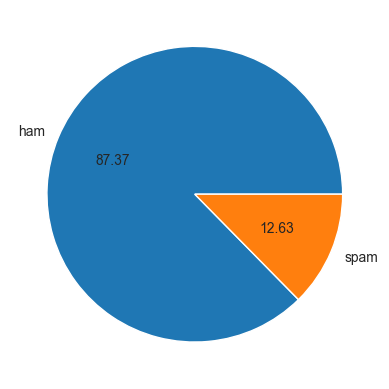

In [124]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [125]:
# Data is imbalanced

In [126]:
import nltk

In [127]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [129]:
df['num_characters'] = df['text'].apply(len)

In [130]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [131]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [132]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [133]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [134]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [135]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.457729,1.967305
std,58.236293,13.325432,1.448916
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [136]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.125775,1.822188
std,56.358207,13.494698,1.384315
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [137]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.669219,2.970904
std,30.137753,7.009476,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

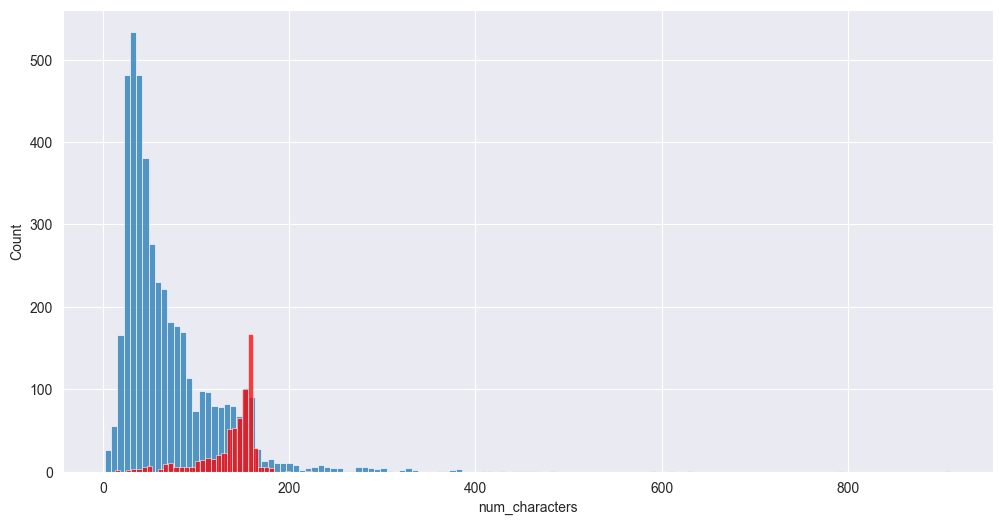

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

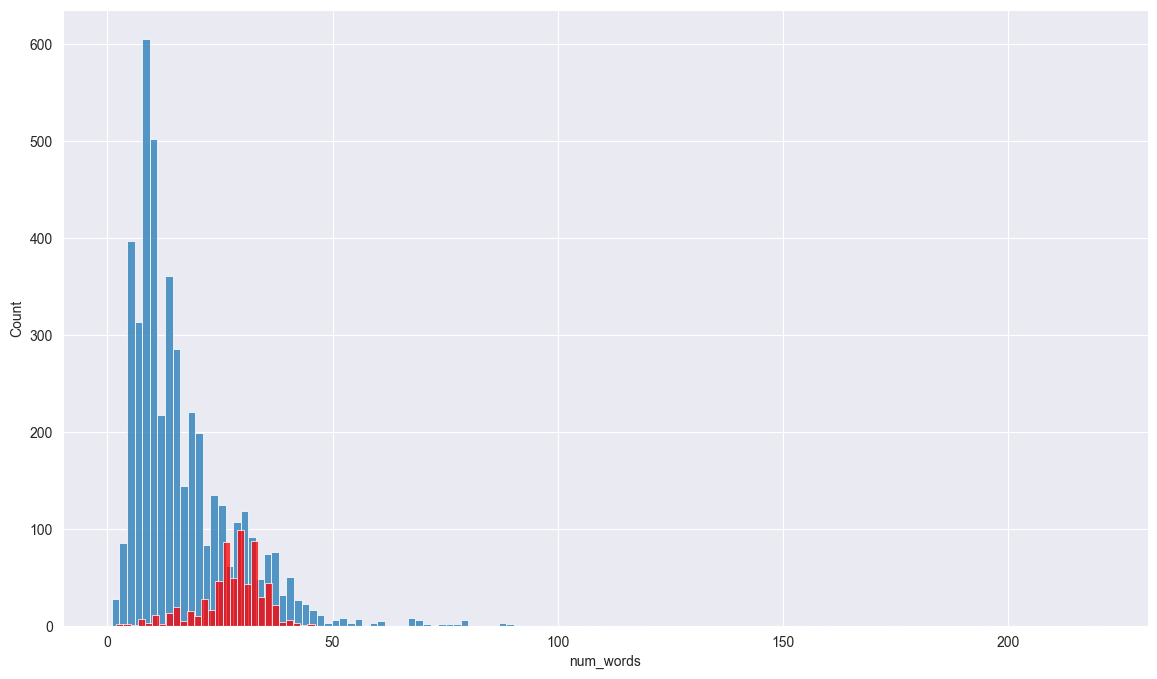

In [140]:
plt.figure(figsize=(14,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

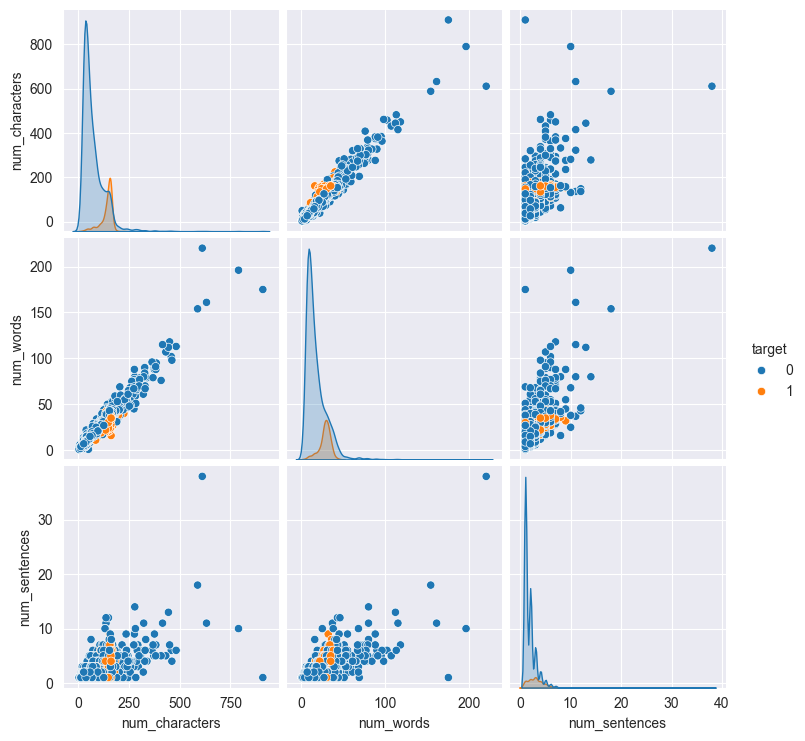

In [141]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [142]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [143]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [144]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [145]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [146]:
transform_text("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [147]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [148]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [149]:
df['transform_text'] = df['text'].apply(transform_text)

In [150]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [151]:
from wordcloud import WordCloud

In [152]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [153]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

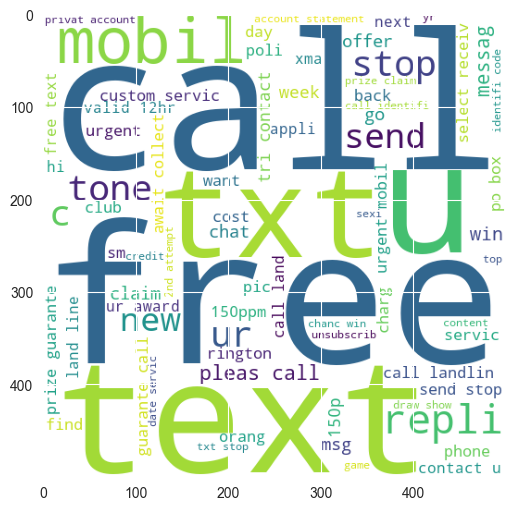

In [154]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [155]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

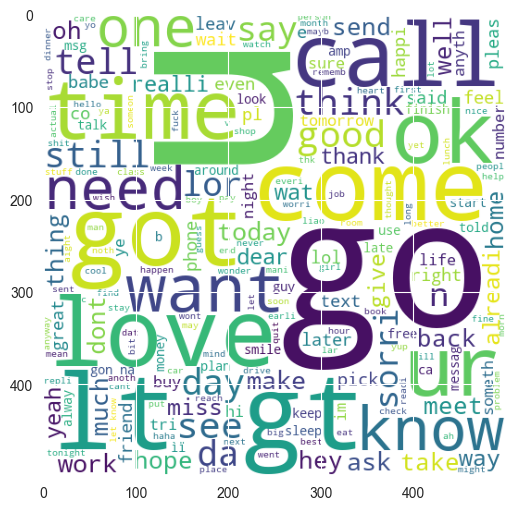

In [156]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [157]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [158]:
df['transformed_text'] = df['text'].str.lower()
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [159]:
len(spam_corpus)

15464

In [160]:
from collections import Counter

Text(0, 0.5, 'Count')

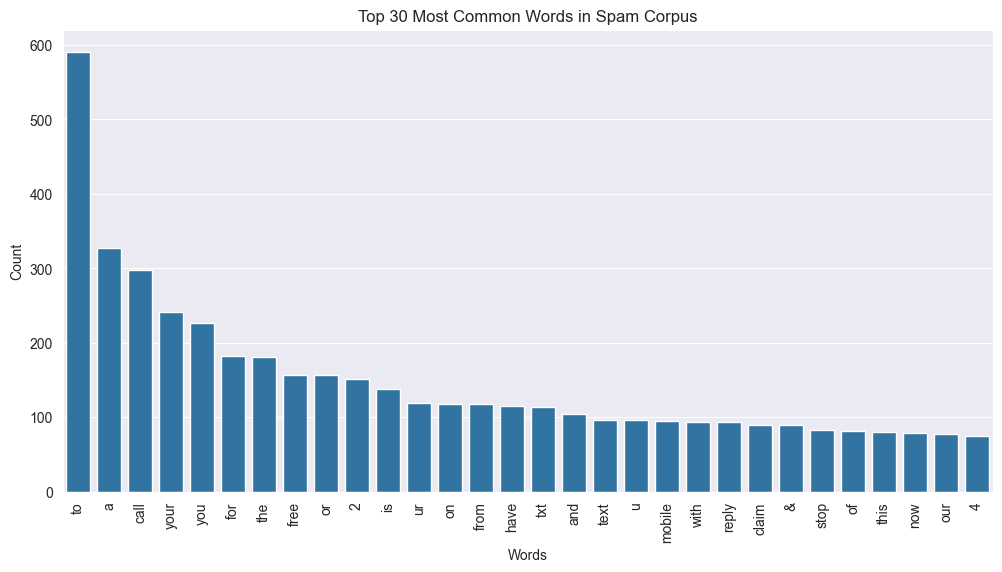

In [161]:
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count']) # Create the bar plot 
plt.figure(figsize=(12, 6)) 
sns.barplot(x='word', y='count', data=common_words) 
plt.xticks(rotation='vertical') 
plt.title('Top 30 Most Common Words in Spam Corpus') 
plt.xlabel('Words') 
plt.ylabel('Count')

In [162]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [163]:
len(ham_corpus)

63832

In [164]:
from collections import Counter

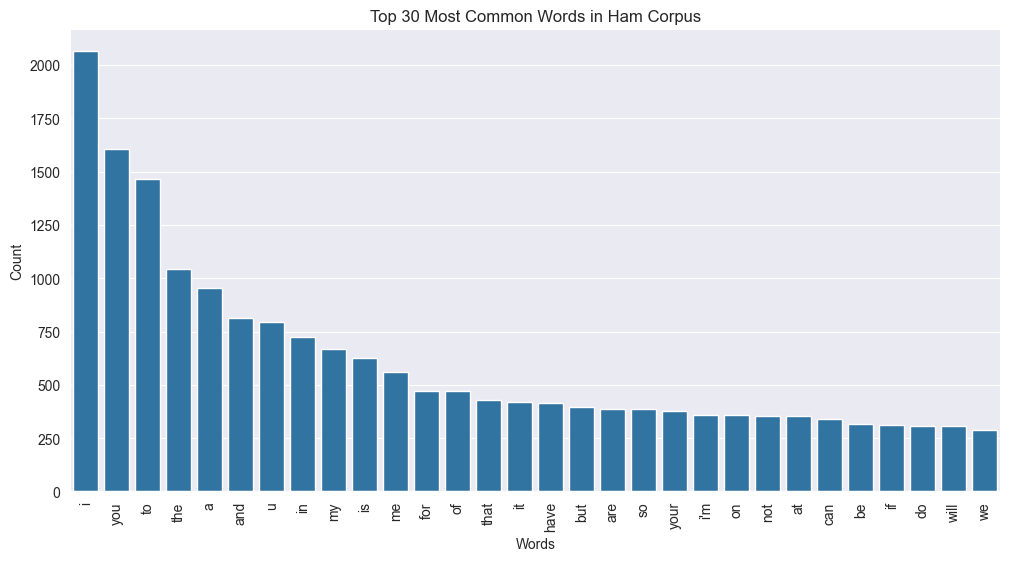

In [165]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count']) 
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_words) 
plt.xticks(rotation='vertical') 
plt.title('Top 30 Most Common Words in Ham Corpus') 
plt.xlabel('Words') 
plt.ylabel('Count') 
plt.show()

In [166]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"nah i don't think he goes to usf, he lives aro..."


## 4. Model Building

In [167]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [168]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [169]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [170]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [171]:
X.shape

(5169, 3000)

In [172]:
y = df['target'].values

In [173]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [177]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8974854932301741
[[811  85]
 [ 21 117]]
0.5792079207920792


In [179]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Create the model
mnb = MultinomialNB()

# Fit the model with training data
mnb.fit(X_train, y_train)

# Predict using the test data
y_pred2 = mnb.predict(X_test)

# Print the accuracy score
print(accuracy_score(y_test, y_pred2))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred2))

# Print the precision score
print(precision_score(y_test, y_pred2))


0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [180]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [181]:
# tfidf --> MNB

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [183]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [184]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [185]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [186]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9816247582205029, 0.983739837398374)

In [187]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) 

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.8888888888888888
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8968253968253969
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.941747572815534
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


In [188]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [189]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.973888,1.000000
5,RF,0.978723,1.000000
0,SVC,0.981625,0.983740
8,ETC,0.980658,0.983607
10,xgb,0.980658,0.983607
6,AdaBoost,0.944874,0.965517
4,LR,0.959381,0.944444
9,GBDT,0.954545,0.941748
7,BgC,0.963250,0.896825


In [190]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [191]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.978723
3,SVC,Accuracy,0.981625
4,ETC,Accuracy,0.980658
5,xgb,Accuracy,0.980658
6,AdaBoost,Accuracy,0.944874
7,LR,Accuracy,0.959381
8,GBDT,Accuracy,0.954545
9,BgC,Accuracy,0.963250


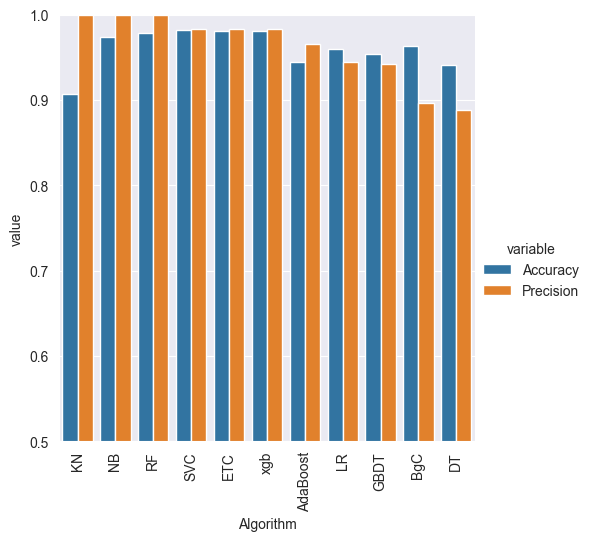

In [192]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [193]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [195]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [196]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [197]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [198]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [199]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
3,SVC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
4,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
5,xgb,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
6,AdaBoost,0.944874,0.965517,0.944874,0.965517,0.944874,0.965517,0.944874,0.965517
7,LR,0.959381,0.944444,0.959381,0.944444,0.959381,0.944444,0.959381,0.944444
8,GBDT,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748
9,BgC,0.963250,0.896825,0.963250,0.896825,0.963250,0.896825,0.963250,0.896825


In [200]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [201]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [202]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [203]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [204]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [205]:
from sklearn.ensemble import StackingClassifier


In [206]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [207]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9558823529411765


In [208]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))